# Simulating Pension Fund Survival in Normal vs Recession Scenarios

## 1. Project Overview
This simulation models the survival of a typical pension fund over a 10-year period. 
The focus is on investment return uncertainty using Monte Carlo simulation.

Demographic risks such as population aging and dynamic contributions or payouts are acknowledged but not directly modeled here. The goal is to isolate the impact of return assumptions and market volatility on fund sustainability.

## 2. Assumptions and Data Sources

**2-1. Investment Allocation:**
The simulated pension portfolio is diversified across major asset classes, using a balanced allocation typical of institutional funds:

- 42% Bonds
- 32% Equities
- 26% Real Estate and Alternatives

**Note:** This allocation reflects general institutional investment practices as reported in global sources such as:
- OECD (2023), *Pensions at a Glance* – [link](https://www.oecd.org/pensions/pensions-at-a-glance.htm)
- WTW (2023), *Global Pension Assets Study* – [link](https://www.wtwco.com/en-US/Insights/2023/03/global-pensions-asset-study-2023)

**2-2. Expected Returns by Asset Class (Nominal):**
These expected returns are long-term nominal averages commonly used in institutional modeling:

- Bonds: 2.5%
- Equities: 7.0%
- Real Estate / Alternatives: 6.0%

**Note:** These values are based on long-term assumptions published by global pension consultants and market outlooks, including:

- BlackRock (2023), *Capital Market Assumptions*
- WTW (2023), *Global Pension Asset Study*
- OECD (2023), *Pensions Outlook*

**2.3 Portfolio Weighted Return and Volatility**
- **Expected Nominal Return: 4.8% per year**   
This is the weighted average expected return of the pension fund's asset allocation. This calculation assumes:
  - 45% allocation to bonds at 2.5%
  - 35% to equities at 7.0%
  - 20% to real estate/alternatives at 6.0%
  
$$
\text{Expected Return} = (0.45 \times 2.5\%) + (0.35 \times 7.0\%) + (0.20 \times 6.0\%) = 4.775\% \approx 4.8\%
$$
  
  
- **Portfolio Volatility: 8% per year**  
  This represents the expected standard deviation of annual returns for the entire portfolio.

  In practice, exact portfolio volatility depends on:
  - The volatilities of each asset class
  - The correlation between them

  However, in this simplified model, 8% is a **reasonable average volatility** for a balanced institutional portfolio based on historical data from pension funds and asset managers.

  **Note:** This estimate avoids complex covariance matrices and reflects typical volatility assumptions used in long-term pension modeling by sources such as:
  - OECD
  - BlackRock Capital Market Assumptions
  - WTW Global Pension Asset Study
  
**2.4 Recession Scenario Adjustments**
These values simulate a prolonged economic downturn where financial markets underperform and uncertainty rises.

- **Expected Nominal Return: –2.0% per year**  
  Reflects the possibility of sustained capital losses in equities, lower or even negative returns from fixed income, and depressed real estate/alternative asset values.  
  This is a conservative but realistic assumption based on historical periods of economic stress.

- **Volatility: 13% per year**  
  Represents increased return variability in crisis periods. During past global recessions, asset class volatilities tended to spike significantly, and pension portfolios became more sensitive to market swings.
  
  **Note:** These values are hypothetical but grounded in historical recessionary patterns (e.g., 2008 GFC, dot-com bust), and used here to stress test pension fund resilience.

**2.5 Simulation Parameters**
These parameters define the scope and structure of the Monte Carlo simulation:

- **Initial Fund Value: €1,000,000,000**  
  Represents the starting size of a large pension fund. This value is typical of major institutional investors and is chosen to reflect a realistic funding scale.

- **Investment Horizon: 10 years**  
  The simulation projects fund performance over a decade. A 10-year horizon is long enough to observe meaningful compounding or drawdown effects while remaining relevant for mid-term policy planning.

- **Number of Simulations: 1000**  
  The simulation runs 1,000 Monte Carlo paths. This ensures a stable distribution of outcomes while keeping computation fast and replicable.

- **Underfunding Threshold: €800,000,000**  
  If the fund value falls below this threshold at the end of the horizon, it is considered underfunded.  
  This 20% drawdown represents a critical loss point where the fund may be unable to meet future obligations without corrective action.

## 3. Simulation Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_fund = 1_000_000_000
years = 10
n_simulations = 1000

# Market conditions
normal_return = 0.048
normal_volatility = 0.08

recession_return = -0.02
recession_volatility = 0.13

threshold = 800_000_000

# Simulation function
def simulate_paths(mean_return, volatility, years, simulations, start_value):
    results = []
    for _ in range(simulations):
        yearly_returns = np.random.normal(mean_return, volatility, years)
        fund = [start_value]
        for r in yearly_returns:
            fund.append(fund[-1] * (1 + r))
        results.append(fund)
    return np.array(results)

## 4. Running Simulations

In [ ]:
sim_normal = simulate_paths(normal_return, normal_volatility, years, n_simulations, initial_fund)
sim_recession = simulate_paths(recession_return, recession_volatility, years, n_simulations, initial_fund)

## 5. Visualization of Fund Paths
### 5.1. Plot for Normal Market

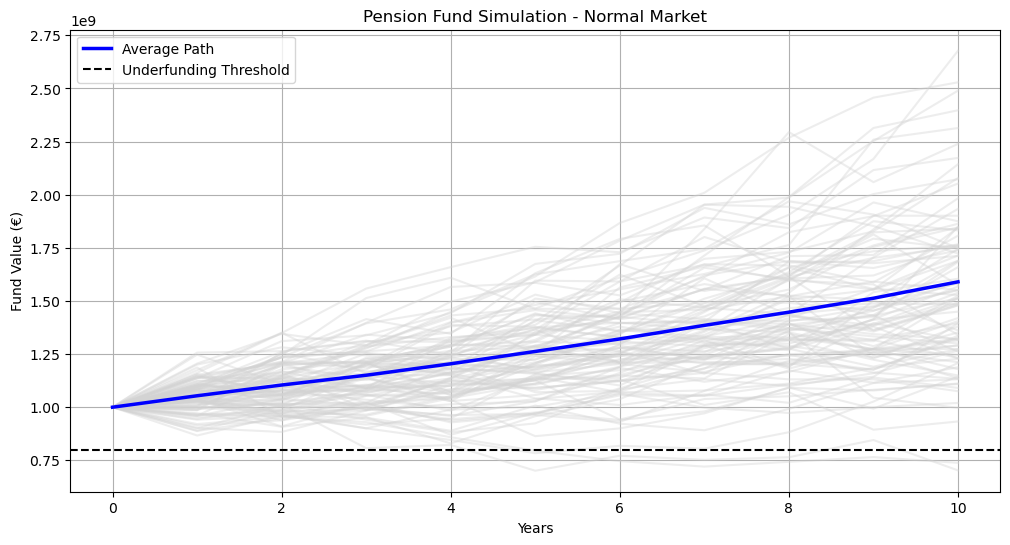

In [15]:
plt.figure(figsize=(12,6))
for i in range(100):
    plt.plot(sim_normal[i], color='lightgray', alpha=0.4)
plt.plot(sim_normal.mean(axis=0), color='blue', linewidth=2.5, label='Average Path')
plt.axhline(threshold, color='black', linestyle='--', label='Underfunding Threshold')
plt.title('Pension Fund Simulation - Normal Market')
plt.xlabel('Years')
plt.ylabel('Fund Value (€)')
plt.legend()
plt.grid(True)
plt.show()

### 5.2. Plot for Recession Scenario

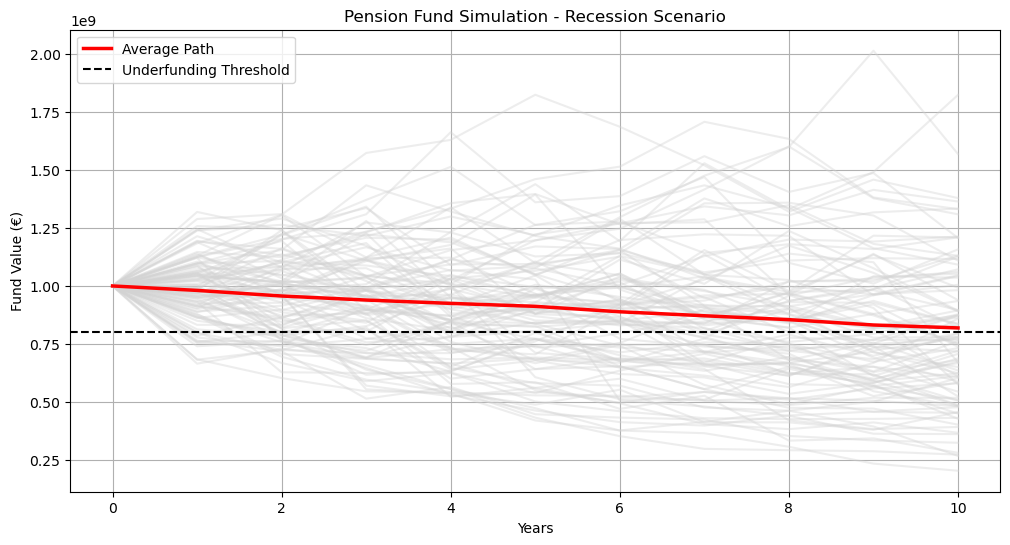

In [16]:
plt.figure(figsize=(12,6))
for i in range(100):
    plt.plot(sim_recession[i], color='lightgray', alpha=0.4)
plt.plot(sim_recession.mean(axis=0), color='red', linewidth=2.5, label='Average Path')
plt.axhline(threshold, color='black', linestyle='--', label='Underfunding Threshold')
plt.title('Pension Fund Simulation - Recession Scenario')
plt.xlabel('Years')
plt.ylabel('Fund Value (€)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3. Combined average fund path comparison

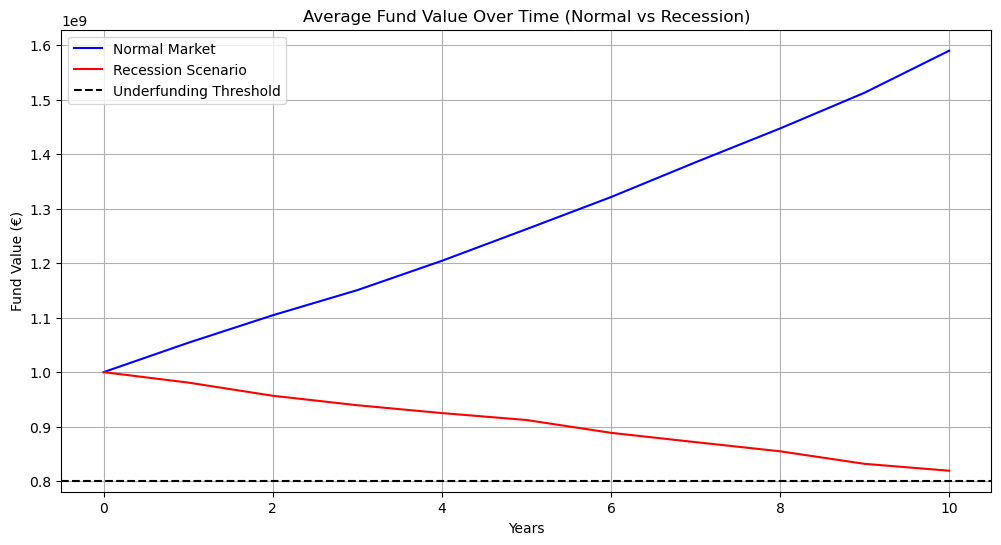

In [17]:
plt.figure(figsize=(12,6))
plt.plot(sim_normal.mean(axis=0), label='Normal Market', color='blue')
plt.plot(sim_recession.mean(axis=0), label='Recession Scenario', color='red')
plt.axhline(threshold, color='black', linestyle='--', label='Underfunding Threshold')
plt.title('Average Fund Value Over Time (Normal vs Recession)')
plt.xlabel('Years')
plt.ylabel('Fund Value (€)')
plt.legend()
plt.grid(True)
plt.show()

## 6. Underfunding Risk Calculation

In [10]:
final_normal = sim_normal[:, -1]
final_recession = sim_recession[:, -1]

risk_normal = np.mean(final_normal < threshold)
risk_recession = np.mean(final_recession < threshold)

print("Underfunding Risk - Normal Market:", f"{risk_normal:.2%}")
print("Underfunding Risk - Recession Scenario:", f"{risk_recession:.2%}")

Underfunding Risk - Normal Market: 0.50%
Underfunding Risk - Recession Scenario: 53.90%


## 7. Interpretation
- In the normal economy, the fund has a high probability of staying above the threshold.
- Under recession conditions, the probability of underfunding increases significantly.
- This highlights the importance of both return levels and volatility in pension fund planning.

## 8. Transition to Structural Risks
> While this simulation focuses on return uncertainty, many countries face additional structural risks such as population aging, low fertility rates, and shrinking workforces. In the next analysis, we examine which countries are most vulnerable to long-term pension crises based on demographic and economic indicators.

## 9. Reflection and Limitations
- This model assumes no contributions or withdrawals.
- Returns are modeled with a normal distribution, which underestimates extreme downside risk.
- Inflation, fees, and dynamic policy changes are not included here.